# Assignment 9
> "This is a Jupyter notebook analyzing the prominence of Shakespeare's Romeo and Juliet characters in the first scene."

- toc:true
- branch: master
- badges: true
- comments: true
- author: Hamel Husain & Jeremy Howard
- categories: [fastpages, jupyter]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
with open('RomieandJules.txt') as f:
    x = f.read()

In [3]:
x

'The Project Gutenberg EBook of Shakespeare\'s Tragedy of Romeo and Juliet, by \nWilliam Shakespeare\n\nTitle: Shakespeare\'s Tragedy of Romeo and Juliet\n\nAuthor: William Shakespeare\n\nEditor: William J. Rolfe\n\nRelease Date: January 13, 2015 [EBook #47960]\n\nLanguage: English\n\n  SHAKESPEARE\'S\n\n  TRAGEDY OF\n\n  ROMEO AND JULIET\n\n\n  EDITED, WITH NOTES\n\n  ROMEO AND JULIET.\n\n  W.P. 8\n\nROMEO AND JULIET _DRAMATIS PERSONÆ_\n\n  ESCALUS, prince of Verona.\n  PARIS, a young nobleman, kinsman to the prince.\n  MONTAGUE, }\n  CAPULET,  } heads of two houses at variance with each other.\n  An old man of the Capulet family.\n  ROMEO, son to Montague.\n  MERCUTIO, kinsman to the prince, and friend to Romeo.\n  BENVOLIO, nephew to Montague, and friend to Romeo.\n  TYBALT, nephew to Lady Capulet.\n  FRIAR LAURENCE, }\n  FRIAR JOHN,     } Franciscans.\n  BALTHASAR, servant to Romeo.\n  SAMPSON, }\n  GREGORY, } servants to Capulet.\n  PETER, servant to Juliet\'s nurse.\n  ABRAM, ser

In [4]:
x.split('ACT')[1].split('SCENE')[1]

" I. _Verona. A Public Place_.\n\n\n_Enter_ SAMPSON _and_ GREGORY, _of the house of Capulet, with swords and\nbucklers_\n\n  _Sampson._ Gregory, on my word, we'll not carry\n  coals.\n\n  _Gregory._ No, for then we should be colliers.\n\n  _Sampson._ I mean, an we be in choler we'll draw.\n\n  _Gregory._ Ay, while you live, draw your neck out\n  o' the collar.\n\n  _Sampson._ I strike quickly, being moved.\n\n  _Gregory._ But thou art not quickly moved to strike.\n\n  _Sampson._ A dog of the house of Montague moves\n  me.                                                               10\n\n  _Gregory._ To move is to stir, and to be valiant is\n  to stand; therefore, if thou art moved, thou runn'st\n  away.\n\n  _Sampson._ A dog of that house shall move me to\n  stand; I will take the wall of any man or maid of\n  Montague's.\n\n  _Gregory._ That shows thee a weak slave; for the\n  weakest goes to the wall.\n\n  _Sampson._ True; and therefore women, being the\n  weaker vessels, are ever 

In [5]:
acts = x.split('ACT')[6:]

In [6]:
characters = [
    'Romeo',
    'Rom',
    'Juliet',
    'Jul',
    'Nurse',
    'Tybalt',
    'Capulet',
    'Montague',
    'Paris',
    'Benvolio',
    'John',
    'Balthasar',
    'Abram',
    'Peter',
    'Rosaline',
]

In [7]:
charnum = {}

connections = {}
for i in range(len(characters)-1):
    for j in range(i+1,len(characters)):
        connections[(characters[i],characters[j])] = 0

for k in characters:
    charnum[k] = 0

for i in acts:
    for j in i.split('SCENE')[1:]:
        scenechars = []
        for k in characters:
            if j.find(k) != -1:
                scenechars.append(k)
                charnum[k] += 1
        for a in range(len(scenechars)-1):
            for b in range(a+1,len(scenechars)):
                connections[(scenechars[a],scenechars[b])] += 1

In [8]:
charnum

{'Romeo': 16,
 'Rom': 17,
 'Juliet': 14,
 'Jul': 15,
 'Nurse': 9,
 'Tybalt': 8,
 'Capulet': 14,
 'Montague': 4,
 'Paris': 8,
 'Benvolio': 4,
 'John': 14,
 'Balthasar': 2,
 'Abram': 1,
 'Peter': 3,
 'Rosaline': 2}

In [9]:
connections

{('Romeo', 'Rom'): 16,
 ('Romeo', 'Juliet'): 10,
 ('Romeo', 'Jul'): 11,
 ('Romeo', 'Nurse'): 7,
 ('Romeo', 'Tybalt'): 7,
 ('Romeo', 'Capulet'): 10,
 ('Romeo', 'Montague'): 4,
 ('Romeo', 'Paris'): 7,
 ('Romeo', 'Benvolio'): 4,
 ('Romeo', 'John'): 10,
 ('Romeo', 'Balthasar'): 2,
 ('Romeo', 'Abram'): 1,
 ('Romeo', 'Peter'): 2,
 ('Romeo', 'Rosaline'): 2,
 ('Rom', 'Juliet'): 11,
 ('Rom', 'Jul'): 12,
 ('Rom', 'Nurse'): 7,
 ('Rom', 'Tybalt'): 7,
 ('Rom', 'Capulet'): 11,
 ('Rom', 'Montague'): 4,
 ('Rom', 'Paris'): 7,
 ('Rom', 'Benvolio'): 4,
 ('Rom', 'John'): 11,
 ('Rom', 'Balthasar'): 2,
 ('Rom', 'Abram'): 1,
 ('Rom', 'Peter'): 3,
 ('Rom', 'Rosaline'): 2,
 ('Juliet', 'Jul'): 14,
 ('Juliet', 'Nurse'): 6,
 ('Juliet', 'Tybalt'): 6,
 ('Juliet', 'Capulet'): 9,
 ('Juliet', 'Montague'): 3,
 ('Juliet', 'Paris'): 8,
 ('Juliet', 'Benvolio'): 2,
 ('Juliet', 'John'): 10,
 ('Juliet', 'Balthasar'): 1,
 ('Juliet', 'Abram'): 0,
 ('Juliet', 'Peter'): 2,
 ('Juliet', 'Rosaline'): 1,
 ('Jul', 'Nurse'): 7,
 ('Jul

In [10]:
graphitems = []

for k,v in charnum.items():
    dashnode = {'data': {'id': k,
                         'label': k.title(),
                         'size': str(v)}}
    graphitems.append(dashnode)

for k,v in connections.items():
    if v != 0:
        dashedge = {'data': {'source': k[0],
                             'target': k[1],
                             'weight': v}}
        graphitems.append(dashedge)
    
graphitems

[{'data': {'id': 'Romeo', 'label': 'Romeo', 'size': '16'}},
 {'data': {'id': 'Rom', 'label': 'Rom', 'size': '17'}},
 {'data': {'id': 'Juliet', 'label': 'Juliet', 'size': '14'}},
 {'data': {'id': 'Jul', 'label': 'Jul', 'size': '15'}},
 {'data': {'id': 'Nurse', 'label': 'Nurse', 'size': '9'}},
 {'data': {'id': 'Tybalt', 'label': 'Tybalt', 'size': '8'}},
 {'data': {'id': 'Capulet', 'label': 'Capulet', 'size': '14'}},
 {'data': {'id': 'Montague', 'label': 'Montague', 'size': '4'}},
 {'data': {'id': 'Paris', 'label': 'Paris', 'size': '8'}},
 {'data': {'id': 'Benvolio', 'label': 'Benvolio', 'size': '4'}},
 {'data': {'id': 'John', 'label': 'John', 'size': '14'}},
 {'data': {'id': 'Balthasar', 'label': 'Balthasar', 'size': '2'}},
 {'data': {'id': 'Abram', 'label': 'Abram', 'size': '1'}},
 {'data': {'id': 'Peter', 'label': 'Peter', 'size': '3'}},
 {'data': {'id': 'Rosaline', 'label': 'Rosaline', 'size': '2'}},
 {'data': {'source': 'Romeo', 'target': 'Rom', 'weight': 16}},
 {'data': {'source': '

In [11]:
graphitems

[{'data': {'id': 'Romeo', 'label': 'Romeo', 'size': '16'}},
 {'data': {'id': 'Rom', 'label': 'Rom', 'size': '17'}},
 {'data': {'id': 'Juliet', 'label': 'Juliet', 'size': '14'}},
 {'data': {'id': 'Jul', 'label': 'Jul', 'size': '15'}},
 {'data': {'id': 'Nurse', 'label': 'Nurse', 'size': '9'}},
 {'data': {'id': 'Tybalt', 'label': 'Tybalt', 'size': '8'}},
 {'data': {'id': 'Capulet', 'label': 'Capulet', 'size': '14'}},
 {'data': {'id': 'Montague', 'label': 'Montague', 'size': '4'}},
 {'data': {'id': 'Paris', 'label': 'Paris', 'size': '8'}},
 {'data': {'id': 'Benvolio', 'label': 'Benvolio', 'size': '4'}},
 {'data': {'id': 'John', 'label': 'John', 'size': '14'}},
 {'data': {'id': 'Balthasar', 'label': 'Balthasar', 'size': '2'}},
 {'data': {'id': 'Abram', 'label': 'Abram', 'size': '1'}},
 {'data': {'id': 'Peter', 'label': 'Peter', 'size': '3'}},
 {'data': {'id': 'Rosaline', 'label': 'Rosaline', 'size': '2'}},
 {'data': {'source': 'Romeo', 'target': 'Rom', 'weight': 16}},
 {'data': {'source': '

In [12]:
nxgraphitems = []

# for k,v in charnum.items():
#     dashnode = k
#     graphitems.append(dashnode)

for k,v in connections.items():
    if v != 0:
        dashedge = (k[0],k[1])
        nxgraphitems.append(dashedge)
    
nxgraphitems

[('Romeo', 'Rom'),
 ('Romeo', 'Juliet'),
 ('Romeo', 'Jul'),
 ('Romeo', 'Nurse'),
 ('Romeo', 'Tybalt'),
 ('Romeo', 'Capulet'),
 ('Romeo', 'Montague'),
 ('Romeo', 'Paris'),
 ('Romeo', 'Benvolio'),
 ('Romeo', 'John'),
 ('Romeo', 'Balthasar'),
 ('Romeo', 'Abram'),
 ('Romeo', 'Peter'),
 ('Romeo', 'Rosaline'),
 ('Rom', 'Juliet'),
 ('Rom', 'Jul'),
 ('Rom', 'Nurse'),
 ('Rom', 'Tybalt'),
 ('Rom', 'Capulet'),
 ('Rom', 'Montague'),
 ('Rom', 'Paris'),
 ('Rom', 'Benvolio'),
 ('Rom', 'John'),
 ('Rom', 'Balthasar'),
 ('Rom', 'Abram'),
 ('Rom', 'Peter'),
 ('Rom', 'Rosaline'),
 ('Juliet', 'Jul'),
 ('Juliet', 'Nurse'),
 ('Juliet', 'Tybalt'),
 ('Juliet', 'Capulet'),
 ('Juliet', 'Montague'),
 ('Juliet', 'Paris'),
 ('Juliet', 'Benvolio'),
 ('Juliet', 'John'),
 ('Juliet', 'Balthasar'),
 ('Juliet', 'Peter'),
 ('Juliet', 'Rosaline'),
 ('Jul', 'Nurse'),
 ('Jul', 'Tybalt'),
 ('Jul', 'Capulet'),
 ('Jul', 'Montague'),
 ('Jul', 'Paris'),
 ('Jul', 'Benvolio'),
 ('Jul', 'John'),
 ('Jul', 'Balthasar'),
 ('Jul', 'Pete

In [13]:
G = nx.Graph()

In [14]:
G.add_edges_from(nxgraphitems)

In [15]:
G.nodes

NodeView(('Romeo', 'Rom', 'Juliet', 'Jul', 'Nurse', 'Tybalt', 'Capulet', 'Montague', 'Paris', 'Benvolio', 'John', 'Balthasar', 'Abram', 'Peter', 'Rosaline'))

In [16]:
nx.degree_centrality(G)

{'Romeo': 1.0,
 'Rom': 1.0,
 'Juliet': 0.9285714285714285,
 'Jul': 0.9285714285714285,
 'Nurse': 0.7857142857142857,
 'Tybalt': 0.8571428571428571,
 'Capulet': 0.9285714285714285,
 'Montague': 0.7857142857142857,
 'Paris': 0.8571428571428571,
 'Benvolio': 0.8571428571428571,
 'John': 0.9285714285714285,
 'Balthasar': 0.5,
 'Abram': 0.14285714285714285,
 'Peter': 0.6428571428571428,
 'Rosaline': 0.7142857142857142}

In [17]:
dc = nx.degree_centrality(G)
for i in sorted(dc, key=dc.get, reverse=True):
    print('{:15s}: {:.3f}'.format(i.title(), dc[i]))

Romeo          : 1.000
Rom            : 1.000
Juliet         : 0.929
Jul            : 0.929
Capulet        : 0.929
John           : 0.929
Tybalt         : 0.857
Paris          : 0.857
Benvolio       : 0.857
Nurse          : 0.786
Montague       : 0.786
Rosaline       : 0.714
Peter          : 0.643
Balthasar      : 0.500
Abram          : 0.143


In [18]:
from networkx.algorithms.community.centrality import girvan_newman

In [19]:
communities = girvan_newman(G)

[['Nurse', 'John', 'Rom', 'Paris', 'Balthasar', 'Romeo', 'Jul', 'Juliet', 'Capulet', 'Peter', 'Montague', 'Tybalt', 'Rosaline', 'Benvolio'], ['Abram']]


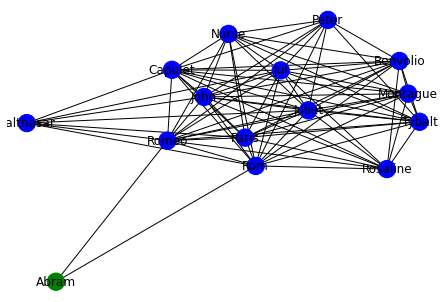

In [20]:
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
 
print(node_groups)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('green')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

This graph shows the amount of interaction between the characters in the first scene of Shakespeare's play "Romeo and Juliet." 

The most important characters are defined by having the most interactions with other characters. These characters include: Romeo, Rom, Juliet, Jul, Capulet, and John. Rom and Jul are included in this because they are referred to with their nicknames a number of times.

The degrees of centrality for these important characters are:

Romeo          : 1.000

Rom            : 1.000

Juliet         : 0.929

Jul            : 0.929

Capulet        : 0.929

John           : 0.929

The closer the degree of centrality to 1, the more prominent the characters are.

In [21]:
from networkx.algorithms.community import greedy_modularity_communities

In [22]:
communities = greedy_modularity_communities(G)
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

In [23]:
modularity_class

{'Nurse': 0,
 'John': 0,
 'Paris': 0,
 'Rosaline': 0,
 'Jul': 0,
 'Juliet': 0,
 'Peter': 0,
 'Montague': 0,
 'Tybalt': 0,
 'Capulet': 0,
 'Benvolio': 0,
 'Abram': 1,
 'Rom': 1,
 'Romeo': 1,
 'Balthasar': 1}

[['Nurse', 'John', 'Paris', 'Rosaline', 'Jul', 'Juliet', 'Peter', 'Montague', 'Tybalt', 'Capulet', 'Benvolio'], ['Abram', 'Rom', 'Romeo', 'Balthasar']]


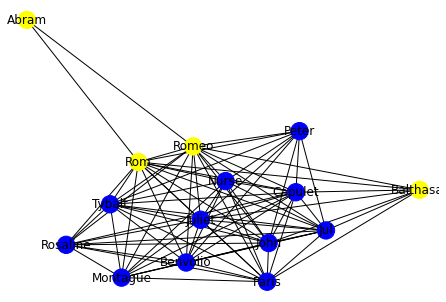

In [24]:
node_groups = []
for com in communities:
    node_groups.append(list(com))
 
print(node_groups)
 
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    elif node in node_groups[1]:
        color_map.append('yellow')
    else:
        color_map.append('green')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

This is a graph that highlights characters with extreme results in regards to centrality. The huge cluster of characters show that they interact a lot with one another with the exception of Balthasar and Abram. Abram seems to only interact with Romeo a.k.a. Rom. This may mean that Abram is being introduced in this first scene.

On the other hand, Balthasar interacts with a select few characters (not every character). With the amount of interaction he has with others, it may be that Balthasar simply only interacts with several people in the whole play.

These are their metrics:

Romeo          : 1.000

Rom            : 1.000

Balthasar      : 0.500

Abram          : 0.143